In [28]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from mpl_axes_aligner import align
import newfig_utils as utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
plt.rcParams['axes.facecolor'] = '#EEEEEE'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 2.0

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

In [30]:
filename = 'data/forAbhi/Velocity_MeanSEM.mat'
data = scipy.io.loadmat(filename)
T4_arclight_gratings_mean = data['Arcmean'][5:110,[16,17,18,19,40,41,42,43]] #taking PD(120deg) and ND(300deg) data
T4_arclight_gratings_sem = data['ArcSE'][5:110,[16,17,18,19,40,41,42,43]] #taking PD(120deg) and ND(300deg) data

T4_gcamp_gratings_mean = data['Gmean'][5:110,[16,17,18,19,40,41,42,43]] #taking PD(120deg) and ND(300deg) data
T4_gcamp_gratings_sem = data['GSE'][5:110,[16,17,18,19,40,41,42,43]] #taking PD(120deg) and ND(300deg) data

In [31]:
T4_arclight_gratings_mean.shape

(105, 8)

In [32]:
filename = 'data/forAbhi/Edge_MeanSEM.mat'
data = scipy.io.loadmat(filename)
T4_arclight_edge_mean = data['Arcmean'][5:110,[0,1,2,3,5,6,7,8]] #excluding 240 deg/sec data
T4_arclight_edge_sem = data['ArcSE'][5:110,[0,1,2,3,5,6,7,8]] #excluding 240 deg/sec data

T4_gcamp_edge_mean = data['Gmean'][5:110,[0,1,2,3,5,6,7,8]] #excluding 240 deg/sec data
T4_gcamp_edge_sem = data['GSE'][5:110,[0,1,2,3,5,6,7,8]] #excluding 240 deg/sec data

In [33]:
#Reading arclight and gcamp gratings contrast and speed peak and dsi mean with sem data
filename = 'data/PeakandDSIwithSEMdata/Grating_MeanSEM.mat'
data = scipy.io.loadmat(filename)
gcamp_grating_speed_peakdsi = data['GCaGratingVelocity'] #it has 4 rows corresponding to 4 speeds. 6 columns corresponding to PDmean, PDerror, NDmean,NDerror,DSImean,DSIerror
gcamp_grating_contrast_peakdsi = data['GCaGratingContrast'][::-1,:] #reaaranging rows so that the contrast goes from 10% to 100%
arclight_grating_speed_peakdsi = data['ArcGratingVelocity']
arclight_grating_contrast_peakdsi = data['ArcGratingContrast'][::-1,:]

In [34]:
#Reading arclight and gcamp edge contrast and speed peak and dsi mean with sem data
filename = 'data/PeakandDSIwithSEMdata/Edge_MeanSEM.mat'
data = scipy.io.loadmat(filename)
gcamp_edge_speed_peakdsi = data['GCaEdgeVelocity'] #it has 4 rows corresponding to 4 speeds. 6 columns corresponding to PDmean, PDerror, NDmean,NDerror,DSImean,DSIerror
gcamp_edge_contrast_peakdsi = data['GCaEdgeContrast'][::-1,:]
arclight_edge_speed_peakdsi = data['ArcEdgeVelocity']
arclight_edge_contrast_peakdsi = data['ArcEdgeContrast'][::-1,:]

In [35]:
gcamp_grating_speed_peakdsi

array([[2.15231, 0.16777, 0.16756, 0.024  , 0.83931, 0.02892],
       [1.22303, 0.09582, 0.07834, 0.01776, 0.85201, 0.03289],
       [0.44712, 0.03617, 0.07618, 0.01726, 0.64815, 0.07918],
       [0.21393, 0.03743, 0.05488, 0.01626, 0.27423, 0.12021]])

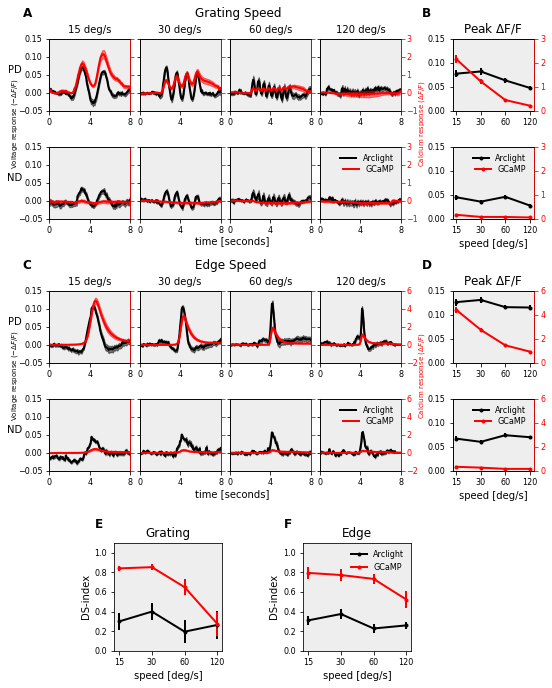

In [36]:
def plot_fig1():
    
    f = plt.figure(figsize=(7.5,10))
    
    axis_title = ['15 deg/s', '30 deg/s', '60 deg/s', '120 deg/s']
    xlabel = 'speed [deg/s]'
    xticklabel = [15,30,60,120]
    utils.plot_newsignals([T4_arclight_gratings_mean, T4_gcamp_gratings_mean], 
                          [T4_arclight_gratings_sem, T4_gcamp_gratings_sem], 
                          [arclight_grating_speed_peakdsi, gcamp_grating_speed_peakdsi],
                       [(-0.05,0.15),(-1.0,3.0)],0.85, axis_title,xlabel,xticklabel,c=['k','r'])
    utils.plot_newsignals([T4_arclight_edge_mean, T4_gcamp_edge_mean], 
                          [T4_arclight_edge_sem, T4_gcamp_edge_sem],
                          [arclight_edge_speed_peakdsi, gcamp_edge_speed_peakdsi],
                          [(-0.05,0.15),(-2.0,6.00)],0.50, axis_title,xlabel,xticklabel,c=['k','r'])
    #data = [[T4_arclight_gratings_mean, T4_gcamp_gratings_mean], [T4_arclight_edge_mean, T4_gcamp_edge_mean]]
    
    utils.plot_DSI_new([arclight_grating_speed_peakdsi, gcamp_grating_speed_peakdsi,
                   arclight_edge_speed_peakdsi, gcamp_edge_speed_peakdsi],'speed [deg/s]',xticklabel)
    
    f.text(0.35,0.98,'Grating Speed',fontsize=12)
    f.text(0.35,0.63,'Edge Speed',fontsize=12)
    f.text(0.35,0.665,'time [seconds]')
    f.text(0.35,0.313,'time [seconds]')
    f.text(0.03,0.98,'A',weight='bold',fontsize=12)
    f.text(0.77,0.98,'B',weight='bold',fontsize=12)
    f.text(0.03,0.63,'C',weight='bold',fontsize=12)
    f.text(0.77,0.63,'D',weight='bold',fontsize=12)
    f.text(0.165,0.27,'E',weight='bold',fontsize=12)
    f.text(0.515,0.27,'F',weight='bold',fontsize=12)
    f.text(0.007, 0.832, r'Voltage response $(-\Delta F/F)$', fontsize=7, va='center', rotation='vertical')
    f.text(0.76, 0.832, r'Calcium response $(\Delta F/F)$', color='red',fontsize=7, va='center', rotation='vertical')
    f.text(0.007, 0.482, r'Voltage response $(-\Delta F/F)$', fontsize=7, va='center', rotation='vertical')
    f.text(0.76, 0.482, r'Calcium response $(\Delta F/F)$', color='red',fontsize=7, va='center', rotation='vertical')
    
    
    plt.savefig('figures/new_figures/figure1.pdf',dpi=1000)
    
plot_fig1()

In [37]:
filename = 'data/forAbhi/Contrast_MeanSEM.mat'
data = scipy.io.loadmat(filename)
T4_arclight_contrast_grating_mean = data['Arcmean'][5:110,[19,18,17,16,43,42,41,40]] #arranging columns so that contrast goes from 10% to 100%
T4_arclight_contrast_grating_sem = data['ArcSE'][5:110,[19,18,17,16,43,42,41,40]] 

T4_gcamp_contrast_grating_mean = data['Gmean'][5:110,[19,18,17,16,43,42,41,40]] 
T4_gcamp_contrast_grating_sem = data['GSE'][5:110,[19,18,17,16,43,42,41,40]]

In [38]:
filename = 'data/forAbhi/Edge_Contrast_MeanSEM.mat'
data = scipy.io.loadmat(filename)
T4_arclight_contrast_edge_mean = data['Arcmean'][5:110,[3,2,1,0,7,6,5,4]] #arranging columns so that contrast goes from 10% to 100%
T4_arclight_contrast_edge_sem = data['ArcSE'][5:110,[3,2,1,0,7,6,5,4]]

T4_gcamp_contrast_edge_mean = data['Gmean'][5:110,[3,2,1,0,7,6,5,4]]
T4_gcamp_contrast_edge_sem = data['GSE'][5:110,[3,2,1,0,7,6,5,4]]

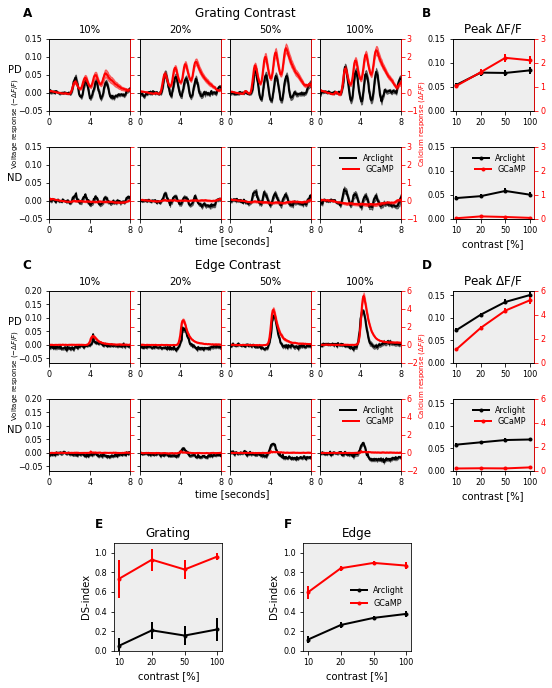

In [39]:
def plot_fig2():
    
    f = plt.figure(figsize=(7.5,10))
    
    axis_title = ['10%', '20%', '50%', '100%']
    xlabel = 'contrast [%]'
    xticklabel = [10,20,50,100]
    utils.plot_newsignals([T4_arclight_contrast_grating_mean, T4_gcamp_contrast_grating_mean],
                 [T4_arclight_contrast_grating_sem, T4_gcamp_contrast_grating_sem],
                          [arclight_grating_contrast_peakdsi, gcamp_grating_contrast_peakdsi],
                          [(-0.05,0.15),(-1.0,3.0)],0.85, axis_title,xlabel,xticklabel,c=['k','r'])
    utils.plot_newsignals([T4_arclight_contrast_edge_mean, T4_gcamp_contrast_edge_mean],
                 [T4_arclight_contrast_edge_sem, T4_gcamp_contrast_edge_sem],
                          [arclight_edge_contrast_peakdsi, gcamp_edge_contrast_peakdsi],
                          [(-0.05,0.16),(-2.0,6.0)],0.50, axis_title,xlabel,xticklabel,c=['k','r'])
    #data = [[T4_arclight_contrast_grating_mean, T4_gcamp_contrast_grating_mean], 
            #[T4_arclight_contrast_edge_mean, T4_gcamp_contrast_edge_mean]]
    #utils.plot_DSI(data, 'contrast [%]',xticklabel)
    utils.plot_DSI_new([arclight_grating_contrast_peakdsi, gcamp_grating_contrast_peakdsi,
                   arclight_edge_contrast_peakdsi, gcamp_edge_contrast_peakdsi],'contrast [%]',xticklabel)
    
    f.text(0.35,0.98,'Grating Contrast',fontsize=12)
    f.text(0.35,0.63,'Edge Contrast',fontsize=12)
    f.text(0.35,0.665,'time [seconds]')
    f.text(0.35,0.313,'time [seconds]')
    f.text(0.03,0.98,'A',weight='bold',fontsize=12)
    f.text(0.77,0.98,'B',weight='bold',fontsize=12)
    f.text(0.03,0.63,'C',weight='bold',fontsize=12)
    f.text(0.77,0.63,'D',weight='bold',fontsize=12)
    f.text(0.165,0.27,'E',weight='bold',fontsize=12)
    f.text(0.515,0.27,'F',weight='bold',fontsize=12)
    f.text(0.007, 0.832, r'Voltage response $(-\Delta F/F)$', fontsize=7, va='center', rotation='vertical')
    f.text(0.76, 0.832, r'Calcium response $(\Delta F/F)$', color='red',fontsize=7, va='center', rotation='vertical')
    f.text(0.007, 0.482, r'Voltage response $(-\Delta F/F)$', fontsize=7, va='center', rotation='vertical')
    f.text(0.76, 0.482, r'Calcium response $(\Delta F/F)$', color='red',fontsize=7, va='center', rotation='vertical')
    
    
    plt.savefig('figures/new_figures/figure2.pdf',dpi=1000)
    
plot_fig2()

In [14]:
gcamp_grating_contrast_peakdsi

array([[1.0429 , 0.08891, 0.04243, 0.01497, 0.32359, 0.54254],
       [1.7053 , 0.13938, 0.11725, 0.01948, 0.858  , 0.0414 ],
       [2.1499 , 0.17958, 0.09328, 0.0218 , 0.86846, 0.04009],
       [2.0667 , 0.17318, 0.03745, 0.02687, 0.95822, 0.02716]])

In [69]:
arclight_edge_contrast_peakdsi

array([[0.06063, 0.00388, 0.04939, 0.00339, 0.10487, 0.03551],
       [0.09504, 0.0046 , 0.05357, 0.00353, 0.27928, 0.0281 ],
       [0.13118, 0.00534, 0.06029, 0.004  , 0.37057, 0.02178],
       [0.14879, 0.00617, 0.0657 , 0.00434, 0.39309, 0.02235]])